In [1]:
import os
import seaborn as sns
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.utils import shuffle
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model,preprocessing
import matplotlib.pyplot as pyplot
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\tahas\OneDrive\Desktop\Pro\adult.csv",sep=",") 
#print(data.head())

print(data.head())
print(data.income)


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

## Here i have replace the target data into numerical form.(e.g 1,0)

In [3]:
for i in data["income"]:
    if i  == "<50K":
        data.replace("<50K",0,inplace= True)
    elif i == "<=50K":
        data.replace("<=50K",1,inplace= True)
    elif i == ">50K":
        data.replace(">50K",2,inplace = True)

## Here I have deleted the row with containing this "?"

In [ ]:

print(data.shape)
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]
print(data.shape)


## Here we can see the correlation between target and features

In [8]:
print(data.corr()['income'].sort_values())

fnlwgt            -0.007264
capital-loss       0.148687
capital-gain       0.221034
hours-per-week     0.227199
age                0.237040
educational-num    0.332800
income             1.000000
Name: income, dtype: float64


## Replacing to columns name containing "-" (hyphen ) cus it's not allow to have in python

In [9]:
data.rename(columns = {'educational-num':'educationalnum'}, inplace = True)
data.rename(columns = {'capital-loss':'capitalloss'}, inplace = True)
data.rename(columns = {'capital-gain':'capitalgain'}, inplace = True)
data.rename(columns = {'hours-per-week':'hoursperweek'}, inplace = True)
data.rename(columns = {'marital-status':'maritalstatus'}, inplace = True)
data.rename(columns = {'native-country':'nativecountry'}, inplace = True)
data.rename(columns = {'workclass':'workcless'}, inplace = True)

data.head()

,age,workcless,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,2
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1


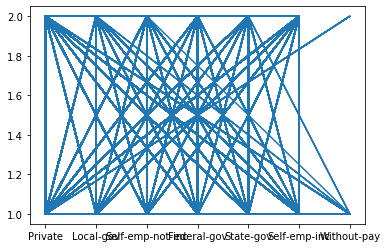

In [13]:
pyplot.plot(data.workcless,data.income)
pyplot.show()

In [15]:
model = preprocessing.OneHotEncoder()
le = preprocessing.LabelEncoder()
data.income = le.fit_transform(data["income"])
data.age = le.fit_transform(data["age"])
data.fnlwgt = le.fit_transform(data["fnlwgt"])
data.educationalnum = le.fit_transform(data["educationalnum"])
data.capitalloss = le.fit_transform(data["capitalloss"])
data.capitalgain = le.fit_transform(data["capitalgain"])
data.hoursperweek = le.fit_transform(data["hoursperweek"])

In [26]:
data.workcless = le.fit_transform(data["workcless"])
data.education = le.fit_transform(data["education"])
data.occupation = le.fit_transform(data["occupation"])
data.race = le.fit_transform(data["race"])
data.gender = le.fit_transform(data["gender"])
data.nativecountry = le.fit_transform(data["nativecountry"])
#lela =preprocessing.OneHotEncoder()
# #for 10 columns
# for i in range(10):
#     X[:,i] = le.fit_transform(X[:,i])
data.head()

,age,workcless,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,8,2,18119,1,6,Never-married,6,Own-child,2,1,0,0,39,38,0
1,21,2,3913,11,8,Married-civ-spouse,4,Husband,4,1,0,0,49,38,0
2,11,1,23770,7,11,Married-civ-spouse,10,Husband,4,1,0,0,39,38,1
3,27,2,10474,15,9,Married-civ-spouse,6,Husband,2,1,96,0,39,38,1
5,17,2,15397,0,5,Never-married,7,Not-in-family,4,1,0,0,29,38,0


In [29]:
datas = data[["workcless","education","occupation","race","gender","nativecountry"]].values
datas

array([[ 2,  1,  6,  2,  1, 38],
       [ 2, 11,  4,  4,  1, 38],
       [ 1,  7, 10,  4,  1, 38],
       ...,
       [ 2, 11,  0,  4,  0, 38],
       [ 2, 11,  0,  4,  1, 38],
       [ 3, 11,  3,  4,  0, 38]], dtype=int64)

In [8]:
data=data[["income","age","fnlwgt","educationalnum","capitalloss","capitalgain","hoursperweek"]]
data.head()

,income,age,fnlwgt,educationalnum,capitalloss,capitalgain,hoursperweek
0,0,8,19329,6,0,0,39
1,0,21,4212,8,0,0,49
2,1,11,25340,11,0,0,39
3,1,27,11201,9,0,98,39
4,0,1,5411,9,0,0,29


## Here we are adding the columns to main dataframe

In [ ]:
data['workclass'] = workclass
data['education'] = education
#data['maritalstatus'] = maritalstatus
data['occupation'] = occupation
#data['relationship'] = relationship
data['race'] = race
data['gender'] = gender
data['nativecountry'] = nativecountry

## Here we are spliting the data into X,Y 

In [12]:
X = data.drop(["income"],axis=1)
y = data["income"]
X.head()

,age,fnlwgt,educationalnum,capitalloss,capitalgain,hoursperweek
0,8,19329,6,0,0,39
1,21,4212,8,0,0,49
2,11,25340,11,0,0,39
3,27,11201,9,0,98,39
4,1,5411,9,0,0,29


In [32]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)

In [33]:
mymod = KNeighborsClassifier(n_neighbors=21)

In [34]:
mymod.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [52]:
acc = mymod.score(x_test,y_test)
round(acc,4)

0.8035